# **Problem Statment**

Dataset:Delivery_time.csv

Build simple linear regression model by performing EDA and do necessary transformations and select the best model using Python

Delivery_time -> Predict delivery time using sorting time 

# **Importing Libraries**

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

In [77]:
import warnings
warnings.filterwarnings('ignore')

# **Importing the Dataset**

In [78]:
df=pd.read_csv('delivery_time.csv')

In [79]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# **Performing EDA**

In [80]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [82]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

By seeing this will get to know that there is not null values in our data.

In [83]:
#Renaming the columns for ease of usage
df1= df.rename({'Delivery Time':'DT','Sorting Time':'ST'}, axis=1)

<Axes: xlabel='ST', ylabel='Count'>

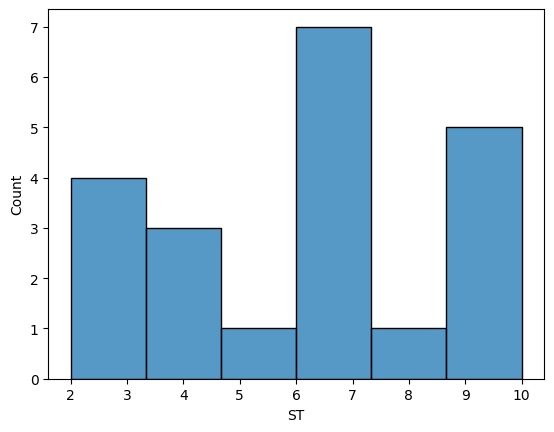

In [84]:
#checking the histogram of feature column
sns.histplot(df1.ST)

<Axes: xlabel='DT', ylabel='Count'>

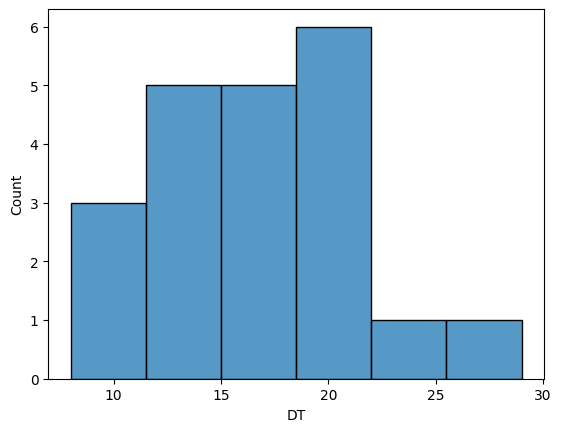

In [85]:
#checking the histogram of target column
sns.histplot(df1.DT)

<Axes: xlabel='ST', ylabel='Density'>

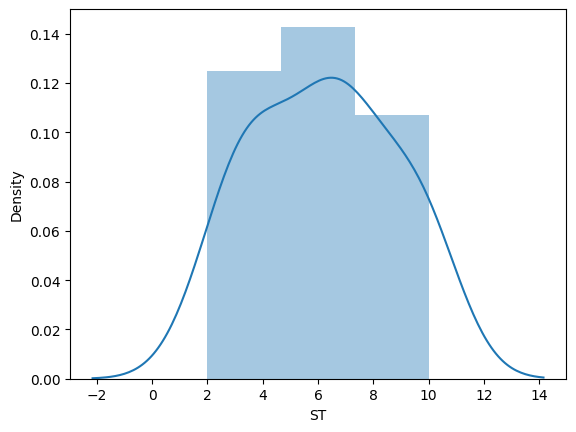

In [86]:
#checking the distplot of feature column
sns.distplot(df1.ST)

<Axes: xlabel='DT', ylabel='Density'>

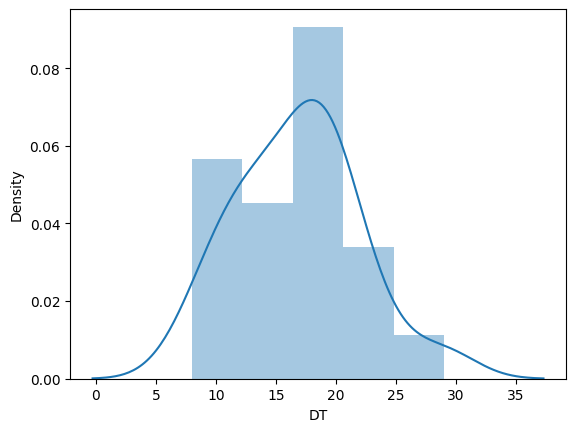

In [87]:
#checking the distplot of feature column
sns.distplot(df1.DT)

By seeing the distplot of feature and target column we will get to know that the data is normally distributed and there is no outlier in the data

<Axes: xlabel='ST', ylabel='DT'>

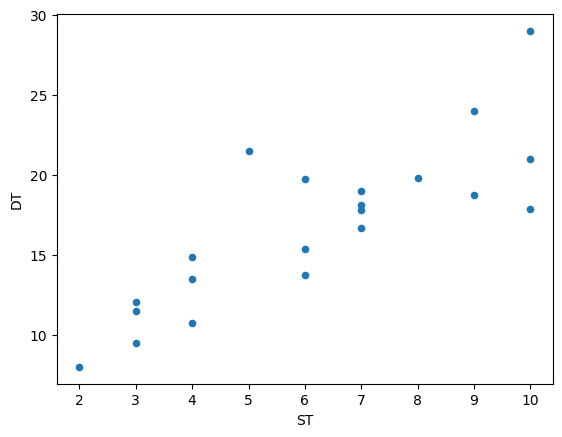

In [88]:
df1.plot('ST','DT',kind='scatter')

From the plot we can see that the relationship does appear to be linear. As Delivery time increases, Sorting time tends to increase in a linear fashion.

<Axes: xlabel='DT'>

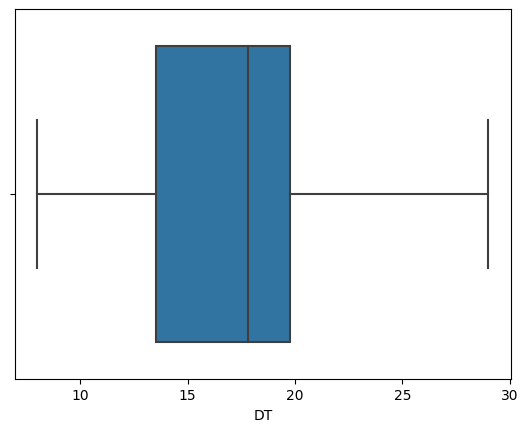

In [89]:
#Checking for the outliers in target column
sns.boxplot(x='DT', data=df1)

<Axes: xlabel='ST'>

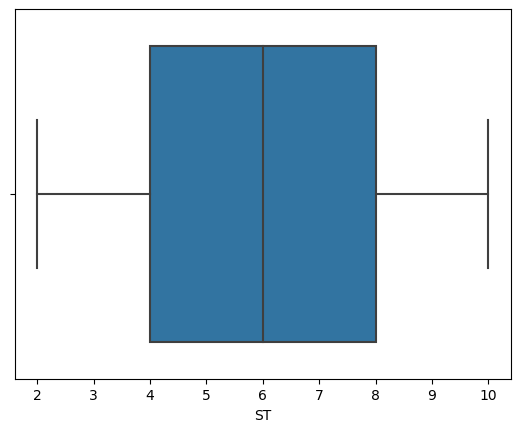

In [90]:
#Checking for the outliers in feature column
sns.boxplot(x='ST', data=df1)

By seeing the above two plots will get to know that there is not having outliers in our data.

In [91]:
df1.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


by checking the correlation of the data we will get to know tha the feature is 82% corelated with the target.



# **Building a model**

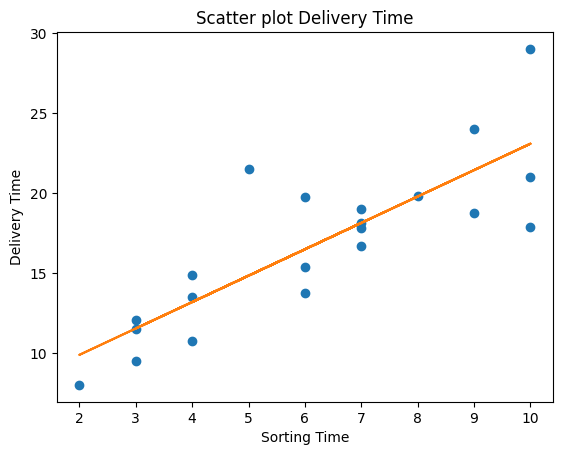

In [92]:
x = df1['ST']
y = df1['DT']
from numpy.polynomial.polynomial import polyfit
m, b = np.polyfit(x, y, 1)

plt.scatter(x, y)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.title('Scatter plot Delivery Time')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()


The scatter plot shows the data contians outliers

# **MODEL 1**

In [97]:
# 1 - No Transformation
model1 = sm.OLS(y, x).fit()
predictions = model1.predict(x)

In [98]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     DT   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Tue, 30 May 2023   Prob (F-statistic):                    6.12e-15
Time:                        15:54:37   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ST             2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **MODEL 2**

In [95]:
# 2 - Log Transformation of X
x_log = np.log(df['Sorting Time'])
model2 = sm.OLS(y, x_log).fit()
predictions = model2.predict(x_log)

In [96]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     DT   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              791.0
Date:                Tue, 30 May 2023   Prob (F-statistic):                    1.48e-17
Time:                        15:53:48   Log-Likelihood:                         -51.035
No. Observations:                  21   AIC:                                      104.1
Df Residuals:                      20   BIC:                                      105.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     9.6706      0.344     28.124      0.000       8.953      10.388
==============================================================================
Omnibus:                        3.656   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.164
Skew:                           0.772   Prob(JB):                        0.339
Kurtosis:                       3.298   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **MODEL 3**

In [99]:
 #3 - Log Transformation of Y
y_log = np.log(df['Delivery Time'])
model3 = sm.OLS(y_log, x).fit()
predictions = model3.predict(x)
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              219.7
Date:                Tue, 30 May 2023   Prob (F-statistic):                    3.00e-12
Time:                        15:55:50   Log-Likelihood:                         -25.284
No. Observations:                  21   AIC:                                      52.57
Df Residuals:                      20   BIC:                                      53.61
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ST             0.4008      0.027     14.821      0.000       0.344       0.457
==============================================================================
Omnibus:                        2.572   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.346
Skew:                          -0.275   Prob(JB):                        0.510
Kurtosis:                       1.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **MODEL 4**

In [100]:
# 4 - Log Transformation Of X And Y
model4 = sm.OLS(y_log, x_log).fit()
predictions = model4.predict(x_log)
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Tue, 30 May 2023   Prob (F-statistic):                    5.72e-17
Time:                        15:56:26   Log-Likelihood:                         -13.899
No. Observations:                  21   AIC:                                      29.80
Df Residuals:                      20   BIC:                                      30.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.5396      0.059     26.244      0.000       1.417       1.662
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.304   Prob(JB):                        0.566
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **MODEL 5**

In [101]:
#5 - Square Root Transformation Of X
x_sqrt = np.sqrt(df['Sorting Time'])
model5 = sm.OLS(y, x_sqrt).fit()
predictions = model5.predict(x_sqrt)
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     DT   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              772.0
Date:                Tue, 30 May 2023   Prob (F-statistic):                    1.88e-17
Time:                        15:57:24   Log-Likelihood:                         -51.284
No. Observations:                  21   AIC:                                      104.6
Df Residuals:                      20   BIC:                                      105.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     6.9466      0.250     27.785      0.000       6.425       7.468
==============================================================================
Omnibus:                        6.818   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.599
Skew:                           1.090   Prob(JB):                        0.100
Kurtosis:                       3.708   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **MODEL 6**

In [102]:
# 6 - Square Root Transformation Of Y
y_sqrt = np.sqrt(df['Delivery Time'])
model6 = sm.OLS(y_sqrt, x).fit()
predictions = model6.predict(x)
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              266.0
Date:                Tue, 30 May 2023   Prob (F-statistic):                    5.09e-13
Time:                        15:58:07   Log-Likelihood:                         -31.484
No. Observations:                  21   AIC:                                      64.97
Df Residuals:                      20   BIC:                                      66.01
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ST             0.5926      0.036     16.309      0.000       0.517       0.668
==============================================================================
Omnibus:                        1.452   Durbin-Watson:                   1.434
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                1.105
Skew:                          -0.328   Prob(JB):                        0.575
Kurtosis:                       2.087   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **MODEL 7**

In [103]:
# 7 - Spuare Root Transfrmation of X and Y
model7 = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model7.predict(x_sqrt)
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Tue, 30 May 2023   Prob (F-statistic):                    2.10e-20
Time:                        15:58:37   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Output

We will use Model 7 as it has the best R square value

1 - p-value < 0.01
The model is accepted

2 - coefficient == 1.64
Thus if the value of Sorting Time is increased by 1, the predicted value of Delivery Time will increase by 1.64

3 - Adj. R-sqared == 0.987
The model explains 98.7% of the variance in dependent variable.